In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Impor Library**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
import opendatasets as od
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import geojson as gj
import plotly.express as px
import json
#import urllib.request
#import requests
#from urllib.request import urlopen

from IPython.display import display

plt.style.use('fivethirtyeight')
mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

pd.set_option('display.max_columns', 500)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Membuka Data**

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/london_crime_by_lsoa.csv')

## **Menampilkan Data**

In [7]:
print("Display the top five rows of dataset")
df

Display the top five rows of dataset


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [8]:
print("To print the dimension of dataframe")
print(df.shape)

To print the dimension of dataframe
(13490604, 7)


In [9]:
print("To display column values ")
df1=df.head(10)
df1.columns.values

To display column values 


array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [10]:
print("To check if any column has null values")
print(df.isnull().any())

To check if any column has null values
lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [11]:
df2=df[['borough','value','year']]

## **1. Line Plot**

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Sum of crimes happened in each year:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]
Line graph denoting the total number crime in year 2012 to 2020


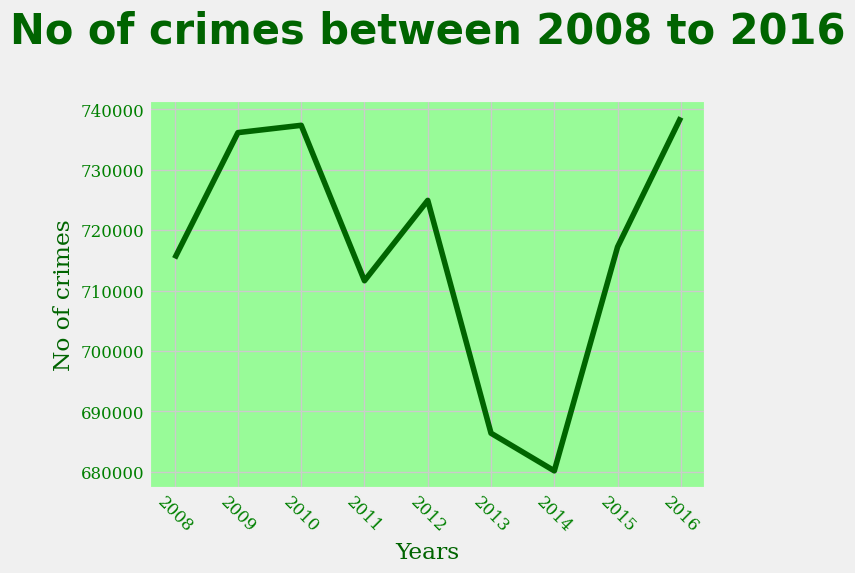

In [22]:
Year=df['year'].unique()
sumsandyear=df.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(Year)

for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Sum of crimes happened in each year:")
print(sums)
print("Line graph denoting the total number crime in year 2012 to 2020")

#Tampilan
pos1 = np.arange(len(Year))
font2 = {'family': 'Arial',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 30,
        }

ax = plt.axes()
ax.set_facecolor("palegreen")
plt.xticks(pos1,Year)
plt.plot(sums,color='darkgreen')
plt.xticks(pos1,Year)
plt.title("No of crimes between 2008 to 2016\n",fontdict=font2)
plt.xlabel('Years',color='darkgreen')
plt.ylabel("No of crimes",color='darkgreen')
plt.xticks(rotation=-45 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(color='green')
plt.yticks(color='green')


plt.show()

**Analisis :**

Grafik di atas menunjukkan tingkat ketiadaan kejahatan di London antara tahun 2008-2016. Grafik tersebut bersifat fluktuatif. Nilai tertinggi ditunjukkan pada tahun 2016, sedangkan nilai terendah ditunjukkan pada tahun 2014.

## **2. Pie Chart**

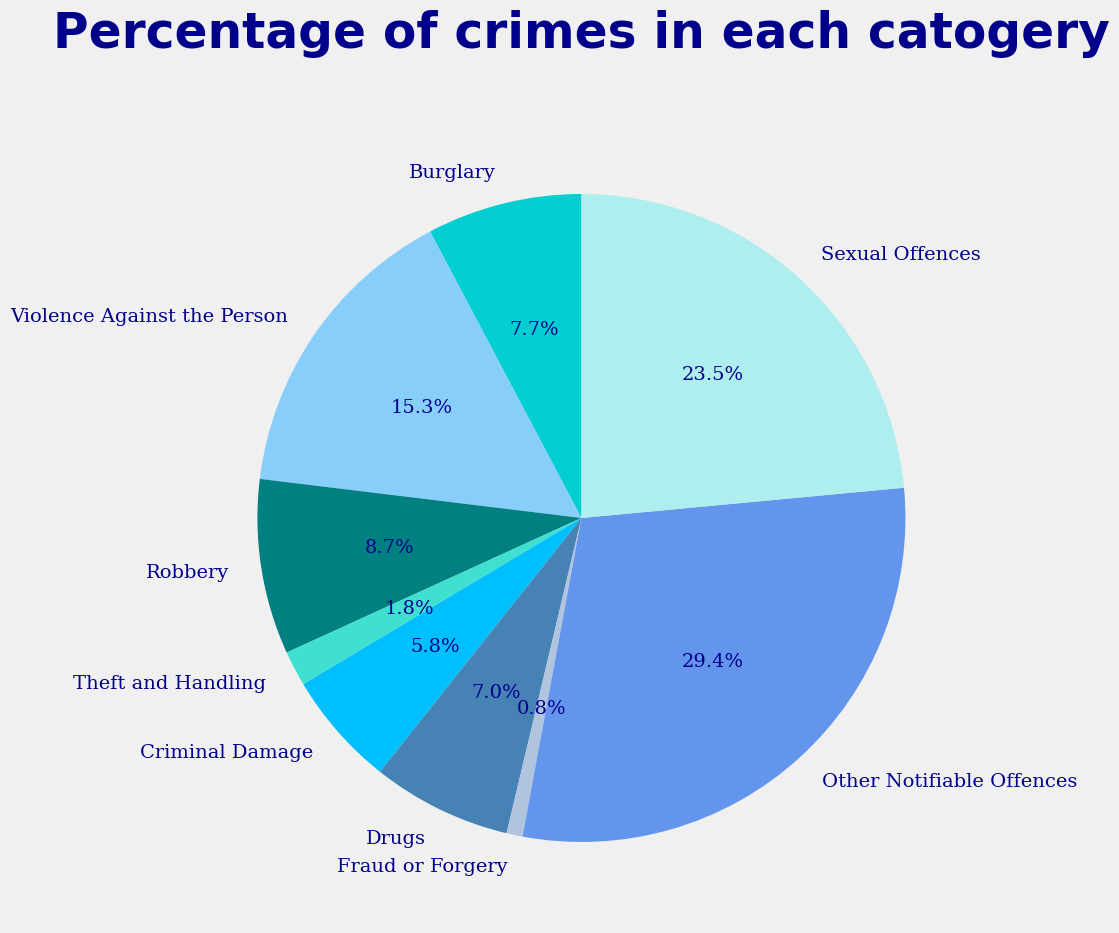

In [13]:
font1 = {'family': 'Franklin Gothic Medium ',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 35,
        }

lables=df['major_category'].unique()

sizes=df.groupby(['major_category']).size()
colors=['darkturquoise','lightskyblue','teal','turquoise', 'deepskyblue','steelblue','lightsteelblue','cornflowerblue','paleturquoise']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Percentage of crimes in each catogery\n',fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show()

Analisis :
Diagram lingkaran di atas menunjukkan jenis kejahatan yang banyak terjadi di London. Jenis kejahatan tertinggi adalah pelanggaran lain (29,4%), sedangkan yang terendah ditunjukkan dengan persentase 0,8%.

## **3. Bar Chart**

The type of crimes that are taking place 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


Total no of crime that took place in each catrgory: 
[ 754293  630938  470765    5325  106349  258873    1273 2661861 1558081]


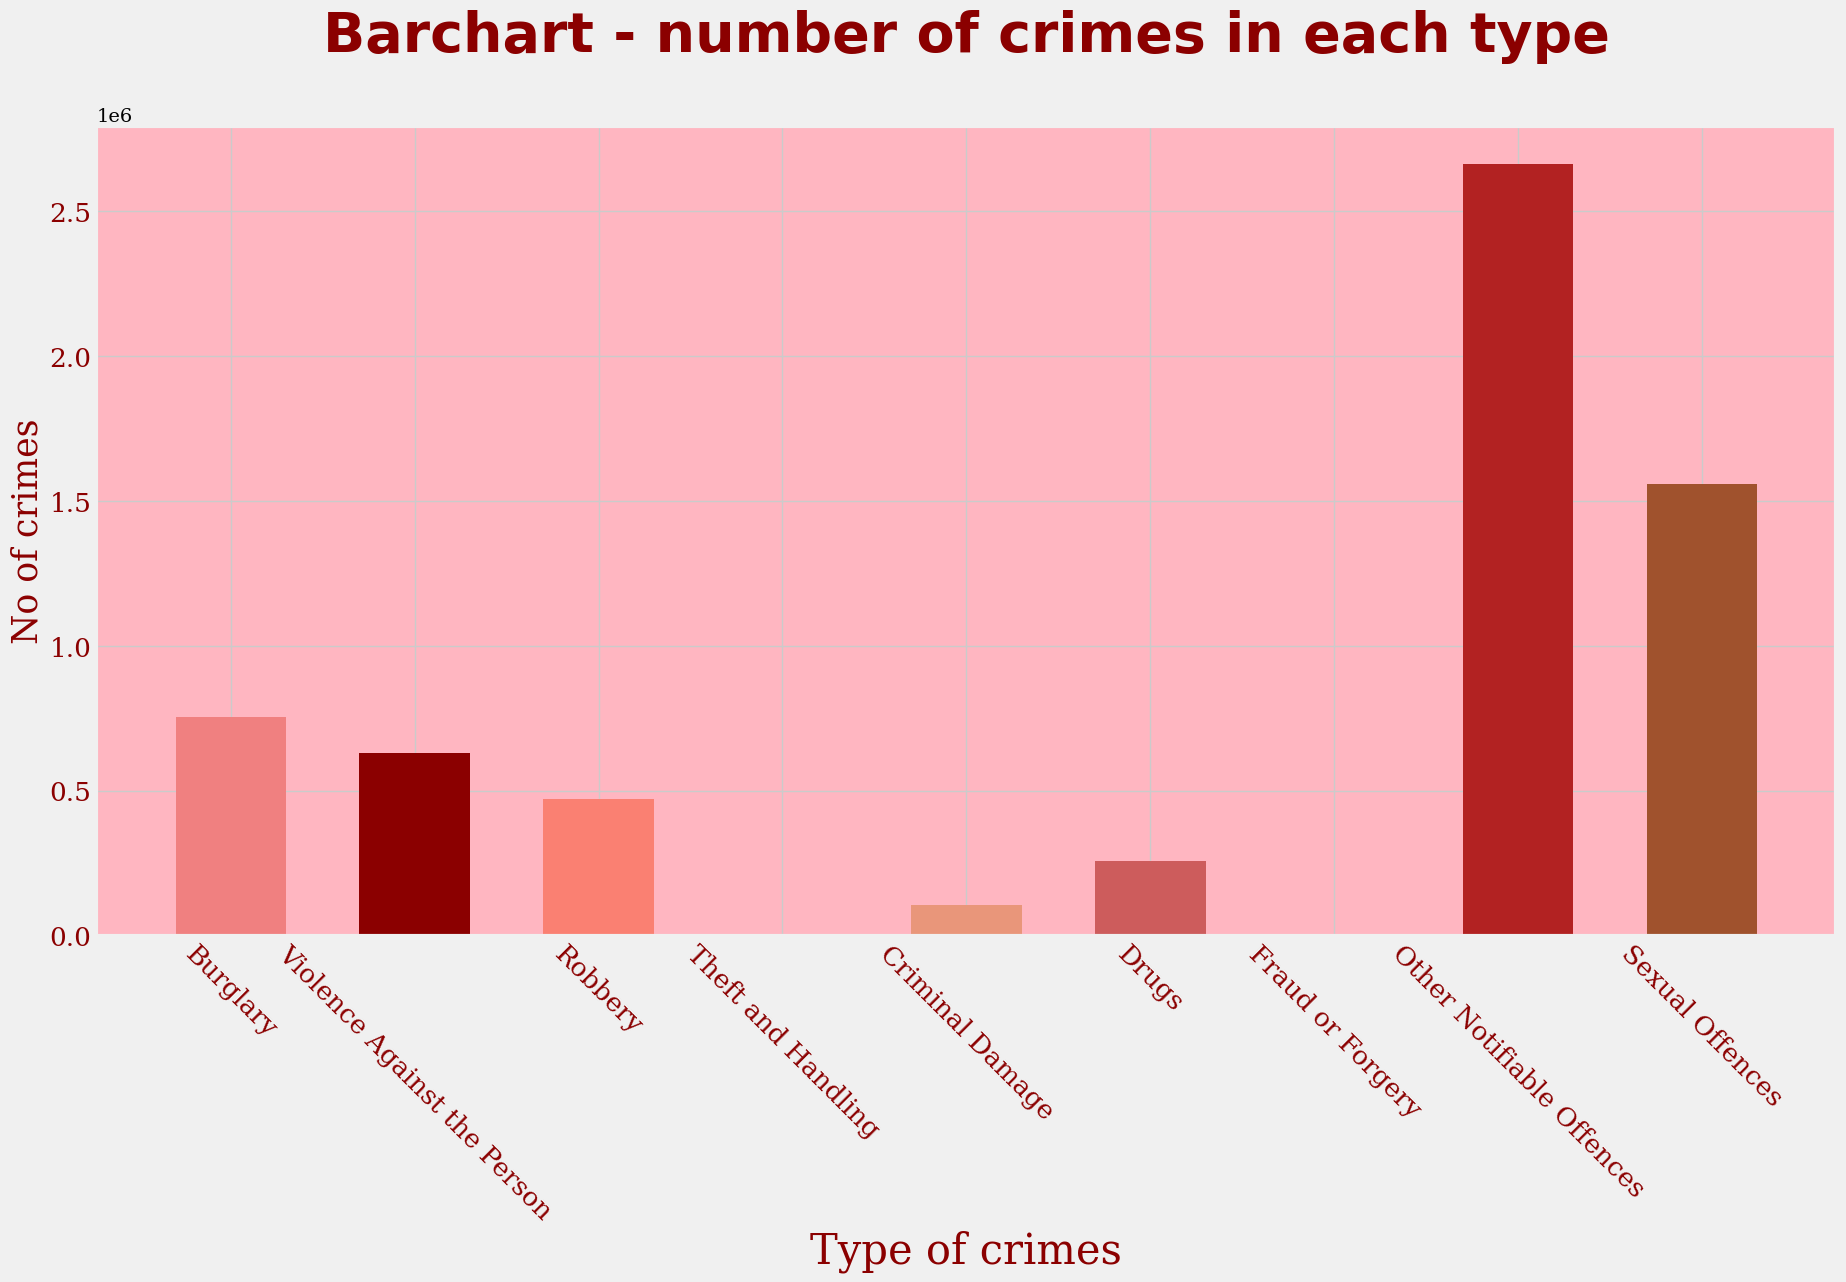

In [14]:
font = {'family': 'Courier New',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

label=df['major_category'].unique()
print("The type of crimes that are taking place ")
print(label)
pos = np.arange(len(label))
totals=df.groupby('major_category').sum()
Totals=totals['value'].to_numpy()
print("Total no of crime that took place in each catrgory: ")
print(Totals)
colors1=['lightcoral','darkred','salmon','coral','darksalmon','indianred','crimson','firebrick','sienna']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightpink")
plt.bar(pos,Totals,color=colors1,width=0.6)
plt.margins(0.05)
plt.xticks(pos, label)
plt.xlabel('Type of crimes', fontsize=30,color='darkred')
plt.xticks(rotation=-45)
plt.xticks(fontsize=19,color='darkred')
plt.yticks(fontsize=19,color='darkred')
plt.ylabel('No of crimes', fontsize=25,color='darkred')
plt.title('Barchart - number of crimes in each type\n',fontdict=font)
plt.show()

## **4. Scatter Plot**

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


<ipython-input-15-16374a545a48>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 56000.0, '56000'),
  Text(0, 58000.0, '58000'),
  Text(0, 60000.0, '60000'),
  Text(0, 62000.0, '62000'),
  Text(0, 64000.0, '64000'),
  Text(0, 66000.0, '66000')])

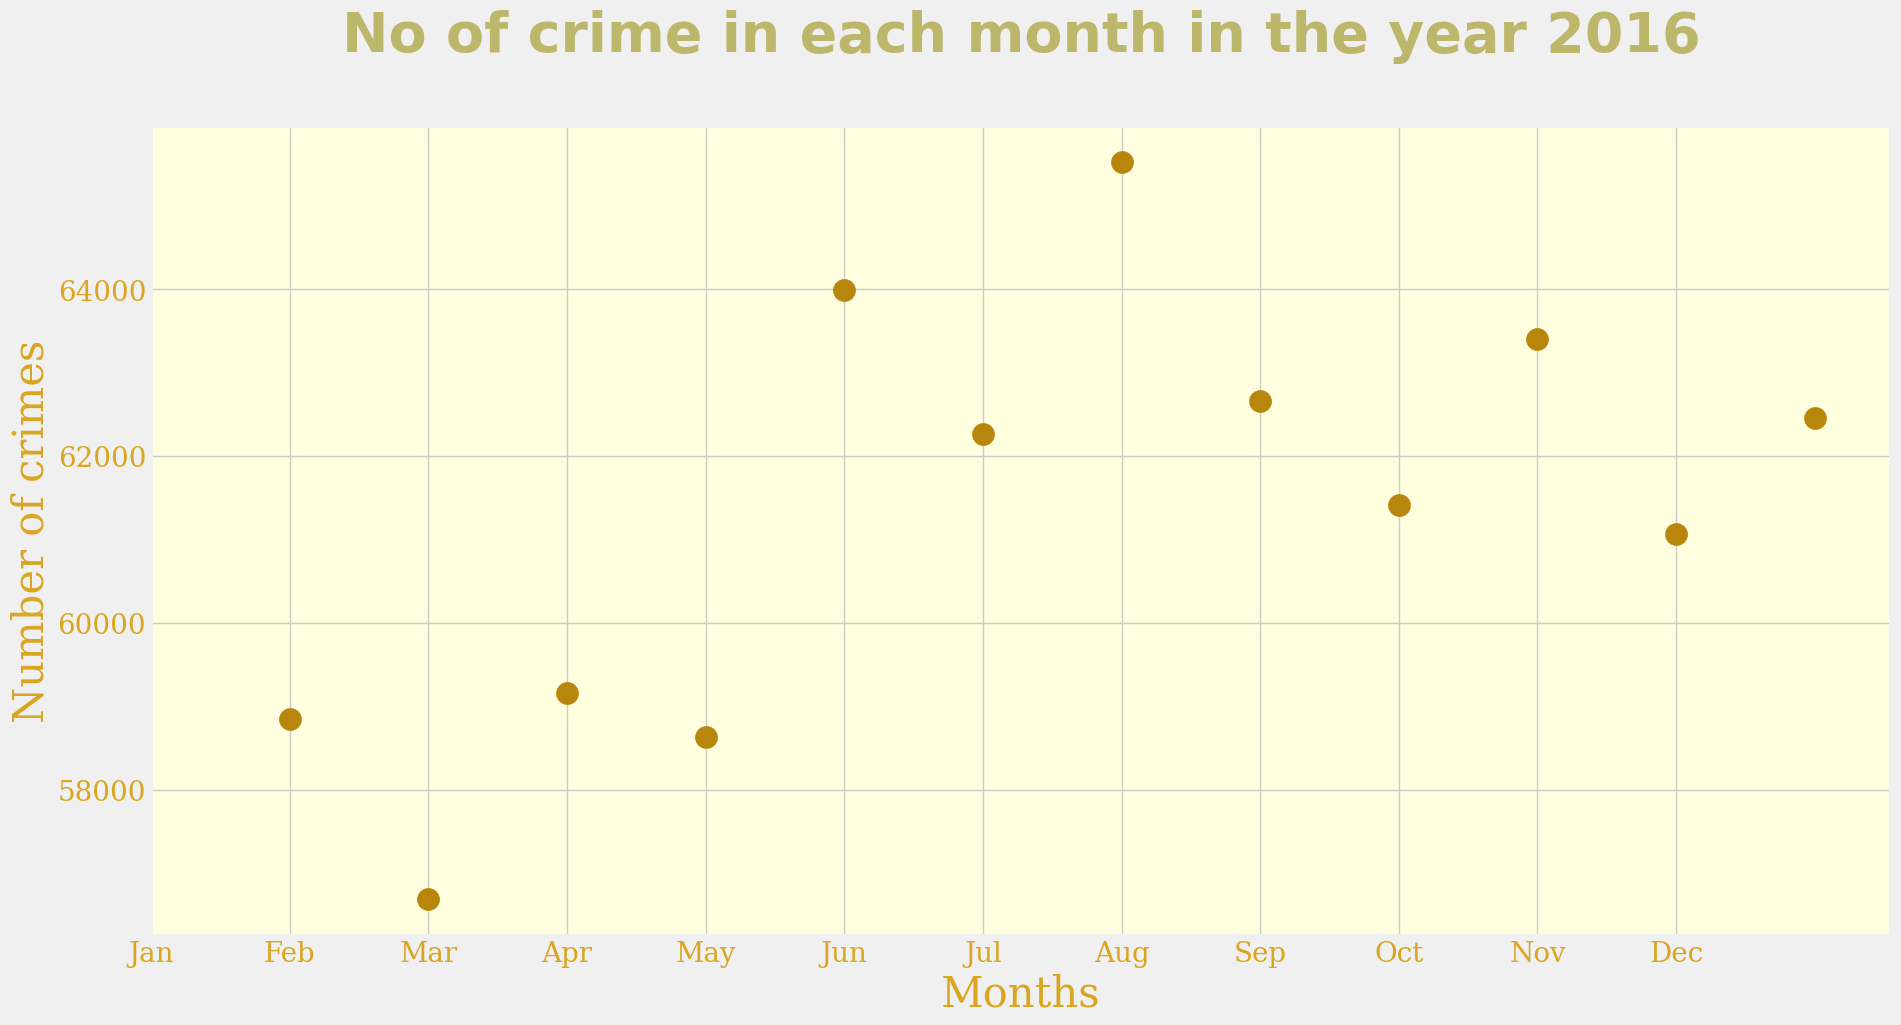

In [15]:
font = {'family': 'Verdana',
        'color':  'darkkhaki',
        'weight': 'bold',
        'size': 40,
        }
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)

plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("No of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='goldenrod')
plt.ylabel('Number of crimes',fontsize=30,color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod',fontsize=20)
plt.yticks(color='goldenrod',fontsize=20)

## **5. Folium Maps**

In [16]:
#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[54.237933,-2.36967], zoom_start=13)

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

Crime rate in boroughs of london
please zoom in to view the map


/usr/local/lib/python3.9/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## **6. Histogram**

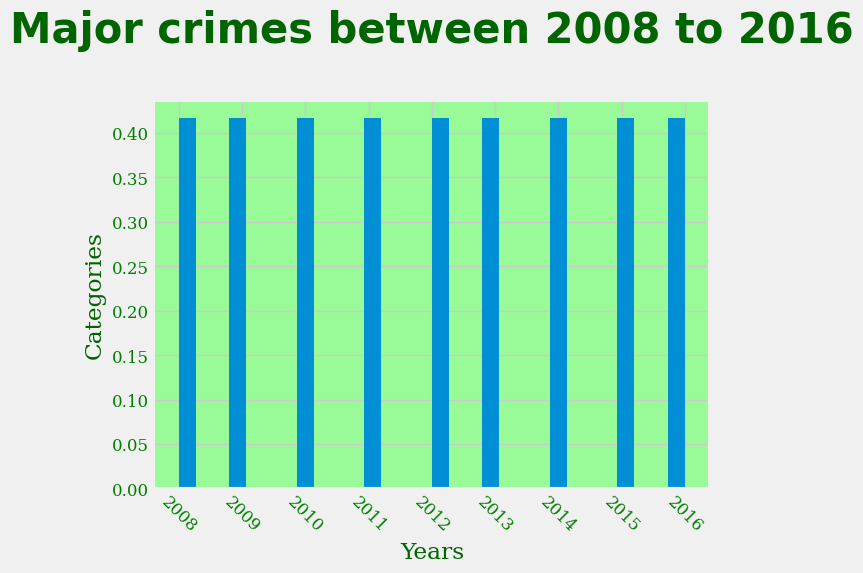

In [20]:
# year=df['year'].unique()
# sumsandyear=df.groupby('year').sum()
# sums=sumsandyear['value'].to_numpy()
x = df['year'].unique()
y = df['major_category'].unique()

n = len(x)


ax = plt.axes()
ax.set_facecolor("palegreen")
# plt.bar(x,y,align='center') # A bar chart
plt.hist(x, density=True, bins=30)  # density=False would make counts
# plt.ylabel('Probability')
# plt.xlabel('Data')

plt.title("Major crimes between 2008 to 2016\n",fontdict=font2)
plt.xlabel('Years',color='darkgreen')
plt.ylabel("Categories",color='darkgreen')
plt.xticks(rotation=-45 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(color='green')
plt.yticks(color='green')


for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]

plt.show()

## **7. Box Plot**

In [21]:
plt.figure(figsize=(8,6))
hasil = df.groupby('major_category').sum()
hasil = hasil['value'].to_numpy()
sns.boxplot(x = df['major_category'], y=df['minor_category'].to_numpy())
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size = 15)
plt.show()

TypeError: ignored

<Figure size 800x600 with 0 Axes>